# Исследование поглощения вторичного космического излучения в веществе
### Бутаков Иван, Гладков Андрей; Б05-871

Цель работы: изучение зависимости интенсивности падающего космического излучения от толщины пройденных им свинцовых пластин.

Оборудование: счётчик частиц, свинцовые пластины.

## Теоретическая часть

Космические лучи - это заполняющие всё пространство микрочастицы с высокой энергией. В пределах Солнечной системы оно изотропно и постоянно во времени. Химический состав представлен в основном протонами и $\alpha$-частицами. Средняя энергия космической частицы 10 ГэВ.

Вторичное космическое излучение возникает вследствие прохождения лучей через атмосферу земли. Компоненты: адронная (ядерно-активная), жесткая (мюонная), мягкая (электронно-фотонная). Через атмосферу до нас долетают только частицы частицы с высокой энергией порядка $10^{10}$ эВ. 

В работе измеряется зависимость интенсивности космических лучей от толщины свинцовых пластин, через которые оно проходит. В целях упрощения считается, что частица в веществе теряет часть своей энергии, либо, потеряв всю свою энергию, останавливается. Принимается, что мягкая компонента не проходит через свинец.

$I_0 = I_M + I_Ж \;$ ($I_0$ - излучение, детектируемое при отсутствии пластин, $I_M, I_Ж$ - мягкая и жесткая его компоненты).

$\frac{I_M}{I_{Ж}} = \frac {N(d) - N(d_{max})}{N(d_{max})} = \frac {N(d)}{N(d_{max})}-1$.

Измерения проводятся при вертикальном падении лучей, соответствующем максимуму их интенсивности.

## Импортирование данных

In [1]:
import pandas
import numpy

In [2]:
# Опыты.
raw_data = pandas.read_csv('data.csv', sep = ' ', header = 0, comment='#', dtype = numpy.int64)

### Обозначения

$n$ - количество пластин, $t$ - время наблюдения, $N$ - количество детектированных частиц.

In [3]:
raw_data

,experiment,n,t,N
0,1,0,200,51
1,1,0,200,54
2,1,0,200,54
3,1,0,200,47
4,2,1,200,38
5,2,1,200,38
6,2,1,200,38
7,3,2,200,36
8,3,2,200,36
9,3,2,200,46


Усреднение результатов происходит по строчкам с одинаковым $n$.



In [4]:
# Усреднение по экспериментам.

data = raw_data.groupby(['experiment', 'n', 't'], as_index=False).mean()
data['delta_N'] = raw_data.groupby(['experiment', 'n', 't'], as_index=False).std()['N'] + 1.0

delta_N - случайная погрешность числа частиц - отклонение числа обнаруженных частиц в серии опытом с данной толщиной.

In [5]:
data

,experiment,n,t,N,delta_N
0,1,0,200,51.500000,4.316625
1,2,1,200,38.000000,1.000000
2,3,2,200,39.333333,6.773503
3,4,3,200,35.333333,6.033223
4,5,4,200,33.333333,4.511885
5,6,5,200,35.333333,1.577350
6,7,6,200,33.000000,4.464102
7,8,7,200,37.200000,5.324350
8,9,8,200,33.000000,8.348469
9,10,9,200,34.000000,7.041523


## Толщина слоя
Измерялась непосредственно линейкой.

In [6]:
# Толщина пластины в [м]
d = 0.019
delta_d = 0.002

In [7]:
#length [м]- это суммарная длина n пластин, delta_length [м]- погрешность этой величины
data['length'] = d * data['n']
data['delta_length'] = delta_d * data['n']

In [8]:
data

,experiment,n,t,N,delta_N,length,delta_length
0,1,0,200,51.500000,4.316625,0.000,0.000
1,2,1,200,38.000000,1.000000,0.019,0.002
2,3,2,200,39.333333,6.773503,0.038,0.004
3,4,3,200,35.333333,6.033223,0.057,0.006
4,5,4,200,33.333333,4.511885,0.076,0.008
5,6,5,200,35.333333,1.577350,0.095,0.010
6,7,6,200,33.000000,4.464102,0.114,0.012
7,8,7,200,37.200000,5.324350,0.133,0.014
8,9,8,200,33.000000,8.348469,0.152,0.016
9,10,9,200,34.000000,7.041523,0.171,0.018


In [9]:
max_length = data['length'].max()
__selected = data[data['length'] == max_length]
max_length__N = numpy.float64(__selected['N'])
max_length__delta_N = numpy.float64(__selected['delta_N'])
print("Максимальная толщина: %.3f м, среднее число частиц на данной длине: %.1f" % (max_length, max_length__N))

Максимальная толщина: 0.171 м, среднее число частиц на данной длине: 34.0


rel_I - это отношение числа частиц, обнаруженных в данном эксперименте, к числу максимально детектированных в опытах. 

In [10]:
data['rel_I'] = data['N'] / max_length__N - 1.0
data['delta_rel_I'] = data['delta_N'] / max_length__N + max_length__delta_N * data['N'] / (max_length__N**2)

In [11]:
data

,experiment,n,t,N,delta_N,length,delta_length,rel_I,delta_rel_I
0,1,0,200,51.500000,4.316625,0.000,0.000,0.514706,0.440661
1,2,1,200,38.000000,1.000000,0.019,0.002,0.117647,0.260881
2,3,2,200,39.333333,6.773503,0.038,0.004,0.156863,0.438811
3,4,3,200,35.333333,6.033223,0.057,0.006,0.039216,0.392673
4,5,4,200,33.333333,4.511885,0.076,0.008,-0.019608,0.335745
5,6,5,200,35.333333,1.577350,0.095,0.010,0.039216,0.261618
6,7,6,200,33.000000,4.464102,0.114,0.012,-0.029412,0.332309
7,8,7,200,37.200000,5.324350,0.133,0.014,0.094118,0.383194
8,9,8,200,33.000000,8.348469,0.152,0.016,-0.029412,0.446556
9,10,9,200,34.000000,7.041523,0.171,0.018,0.000000,0.414207


## Апроксимация

Приблизим зависимость интенсивности падающего излучения от толщины пластин экспонентой: 

In [12]:
X = data['length'].to_numpy()
err_X = data['delta_length'].to_numpy()

Y = data['rel_I'].to_numpy()
err_Y = data['delta_rel_I'].to_numpy()

Предполагаем зависимость $y=a \cdot e^{bx}$:

In [13]:
def exp_fun(x, a, b):
    return a * numpy.exp(b*x)

In [14]:
from scipy.optimize import curve_fit

optimal, _ = curve_fit(exp_fun, X, Y)
X_fun = numpy.linspace(0.0, 0.2, 50)
Y_fun = numpy.array([exp_fun(x, optimal[0], optimal[1]) for x in X_fun])

In [15]:
optimal

array([  0.50181494, -52.21839958])

Таким образом, $a \approx 0.502$, $b \approx -52.218$. Заметим, что $\frac {1}{52.218} \approx 0.01915$ м., что в пределах погрешности отлично соответствует толщине одной пластины.

## График доли мягкого излучения от жесткого

In [16]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

In [17]:
matplotlib.rc('font', **font)

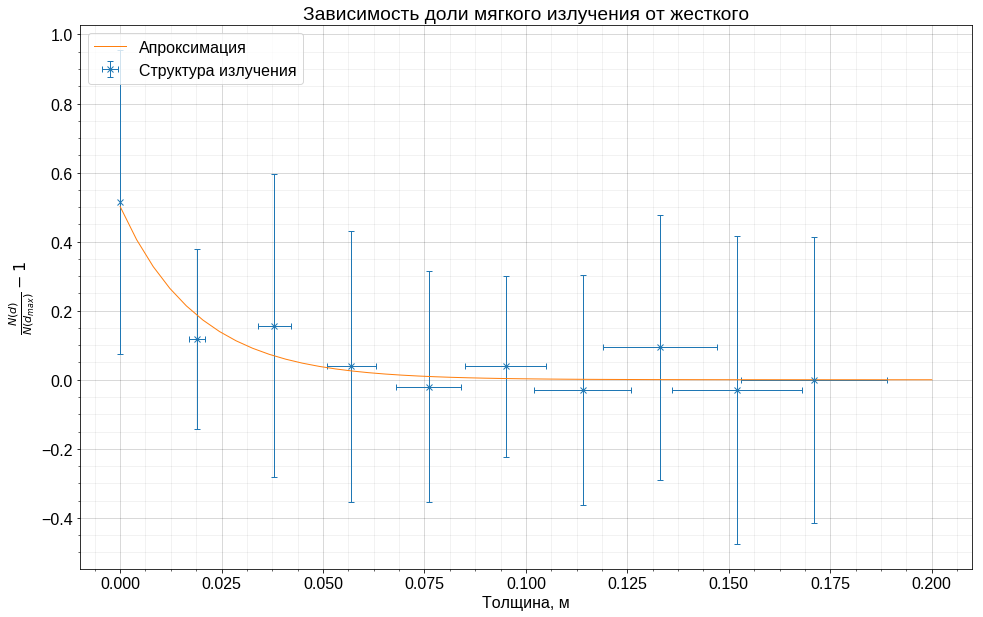

In [18]:
fig, ax = plt.subplots()

ax.set_title("Зависимость доли мягкого излучения от жесткого")

fig.set_figheight(10)
fig.set_figwidth(16)

#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(X, Y, xerr = err_X, yerr = err_Y,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = 'Структура излучения')

ax.plot(X_fun, Y_fun, lw = 1.0, label = 'Апроксимация')

#hline_x = [0.0, 0.2]
#hline_y = [0.0, 0.0]
#ax.plot(hline_x, hline_y)

ax.set_xlabel('Толщина, м')
ax.set_ylabel('$\\frac{N(d)}{N(d_{max})} - 1$')

ax.legend(loc='upper left')
plt.show();

Видно, что доля мягкого излучения от жесткого, соответствующая точке на графике с нулевой абсциссой, равна $50\%$.

## График числа прошедших частиц от суммарной толщины пластин

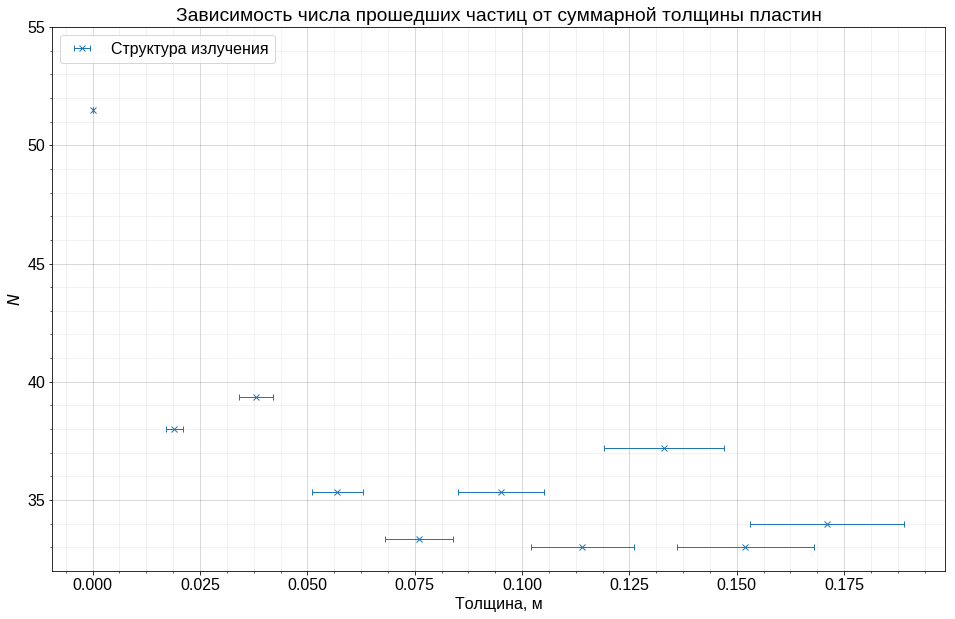

In [19]:
import matplotlib
from matplotlib import pyplot as plt1

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

fig1, ax1 = plt1.subplots()

ax1.set_title("Зависимость числа прошедших частиц от суммарной толщины пластин")

fig1.set_figheight(10)
fig1.set_figwidth(16)

#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)

ax1.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax1.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax1.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax1.set_ylim(32, 55)

Z = data['N'].to_numpy()
ax1.errorbar(X, Z, xerr = err_X,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = 'Структура излучения')

#hline_x = [0.0, 0.2]
#hline_y = [0.0, 0.0]
#ax.plot(hline_x, hline_y)

ax1.set_xlabel('Толщина, м')
ax1.set_ylabel('$N$')

ax1.legend(loc='upper left')
plt1.show();

Похоже на некоторое воплощение хаоса, но это опыт.

# Выводы



1. Построен график зависимости доли мягкого излучения от жесткого. 

2. Установлено, что доля мягкого излучения составляет порядка $50\%$.

3. Получена экспоненциальная аппроксимация, которая с высокой точностью позволяет сказать, что интенсивность мягкого излучения падает в $ e $ раз при прохождении одной пластины.

4. Построен график зависимости числа прошедших частиц от суммарной толщины пластин.